<a href="https://colab.research.google.com/github/grodriguez1123/Metodos1_AndreaRocha_GabrielaRodriguez/blob/main/Tarea_5_M%C3%ADnimos_Cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea: Mínimos Cuadrados
Andrea Rocha 202311471

Gabriela Rodriguez 20232


1,2,3,4,6,7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import copy
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#1

a) Con el método de mínimos cuadrados encuentre el punto común a las tres líneas. Grafique las tres líneas y el punto solución, ¿qué interpretación puede dar?

In [ ]:
A = np.array([[2, -1], [1, 2], [1, 1]])
b = np.array([2, 1, 4])

AT = np.dot(A.T,A)
bT = np.dot(A.T,b)

sol = np.linalg.solve(AT,bT)

sol

array([1.42857143, 0.42857143])

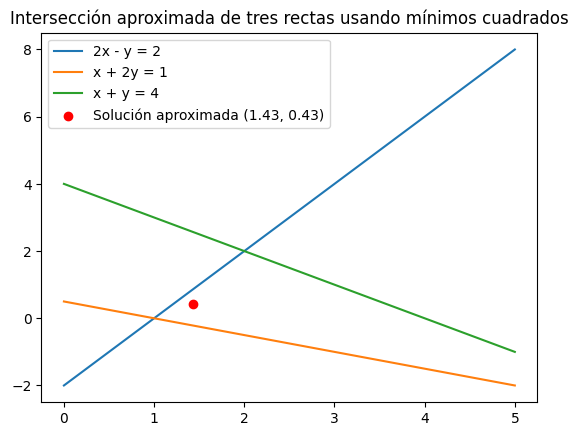

In [ ]:
x = np.linspace(0, 5)
xsol, ysol = sol

def f1(x):
  return 2*x - 2

def f2(x):
  return (1 - x) / 2

def f3(x):
  return 4 - x

plt.plot(x, f1(x), label='2x - y = 2')
plt.plot(x, f2(x), label='x + 2y = 1')
plt.plot(x, f3(x), label='x + y = 4')

plt.scatter(xsol, ysol, color='red', label=f'Solución aproximada ({xsol:.2f}, {ysol:.2f})')

plt.legend()
plt.title('Intersección aproximada de tres rectas usando mínimos cuadrados')
plt.show()

(b)  Realice una búsqueda iterativa entre −5≤x≤5 y −5≤y≤5 con un paso de h= 0.01 para encontrar la menor distancia del problema.  Grafique la distancia y compare con el resultado obtenido con mínimos cuadrados.

In [ ]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

def distancia(x, y, A, b):
    punto = np.array([x, y])
    return np.linalg.norm((np.dot(A, punto) - b))

In [ ]:
d = float('inf')
lista=np.zeros((1000,1000))
for i in range(len(x)):
  for j in range(len(y)):
    l = distancia(x[i],y[j],A,b)
    lista[i,j] = l
    if l < d:
      d = l
      coord = (x[i],y[j])
coord

(1.4264264264264268, 0.4254254254254253)

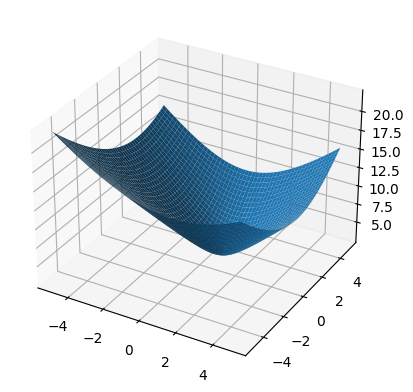

In [ ]:
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,lista)

NOTA: es la misma gráfica, solo que no supimos como poner el eje z a la izquierda y ponerle colores :(

In [ ]:
d
coord

(1.4264264264264268, 0.4254254254254253)

#2. Ajuste lineal

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")
!ls

'Bases Probabilidad.ipynb'			     Datos
 Complementaria_02.ipynb			     DatosOptimizacion.ipynb
 Complementaria_03.ipynb			    'MediaMovil (1).ipynb'
 Complementaria_04.ipynb			     MinimosCuadrados.ipynb
 Complementaria_06.ipynb			     MultiLineal.ipynb
 Complementaria_07_a.ipynb			     Optimize.ipynb
 Complementaria_09_new.ipynb			     ResumenParcial1.ipynb
'Copia de Parcial_1_Métodos_Computacionales.ipynb'   Tarea3Integración.ipynb
'Copia de Tarea 1 -  Diferenciación'		    'Tarea 4-Álgebra Lineal.ipynb'
'Copia de Tarea Integración.ipynb'		     Tarea5MinimosGaby.ipynb
'Copia de Tarea Interpolacion.ipynb'		     Untitled


In [ ]:
file = '/content/drive/MyDrive/Colab Notebooks/MinimosLineal.txt'
file

'/content/drive/MyDrive/Colab Notebooks/MinimosLineal.txt'

In [ ]:
data = pd.read_csv(file,sep=' ')
data.columns = ['x','y']

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/MinimosLineal.txt'

In [ ]:
x = np.array(data['x'])
y = np.array(data['y'])
plt.scatter(x,y)

In [ ]:
def GetFit(x,y,n=1):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  # Ajuste
  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsol = np.linalg.solve(AT,bT)

  return xsol

In [ ]:
n=1
xsol = GetFit(x,y,n=1)
xsol


In [ ]:
def GetModel(x,p):

  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [ ]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,xsol)
_y,_x

In [ ]:
plt.scatter(x,y)
plt.plot(_x,_y,color='r',label='2.13074681641327x−5.20732249057208')
plt.legend()

In [ ]:
import sympy as sym
X = sym.Symbol('x')
GetModel(X,xsol)

#3. Ajuste cuadrático

In [ ]:
file3 = '/content/drive/MyDrive/Colab Notebooks/Datos/MinimosCuadraticoTarea.txt'
file3

In [ ]:
data3 = pd.read_csv(file3,sep=' ')
data3.columns = ['x','y']
x = np.array(data3['x'])
y = np.array(data3['y'])

In [ ]:
def GetFit(x,y,n=2):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  # Ajuste
  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsol = np.linalg.solve(AT,bT)

  return xsol

In [ ]:
p = GetFit(x,y)
a2,a1,a0 = GetFit(x,y)

In [ ]:
def GetModel(x,p):

  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [ ]:
X = np.linspace(np.min(x),np.max(x),100)
Y = GetModel(X,p)

In [ ]:
plt.scatter(x,y)
plt.plot(X,Y,color='r',label = f'a0 = ({a0:.2f}), a1 = ({a1:.2f}), a2 = ({a2:.2f})')
plt.legend()

#4. Usando Curve fit

In [ ]:
from scipy.optimize import curve_fit
#para lineal
def f (x, a, b):
  return a*x + b
popt, pcov = curve_fit(f, _x, _y)
print("Parámetros ajustados:", popt)

#para cuadrática
def f2 (x, a, b, c):
  return a*x**2 + b*x + c
popt, pcov = curve_fit(f2, X, Y)
print("Parámetros ajustados:", popt)

NameError: name '_x' is not defined

#6.  Funcion de costo

a) Si  hablamos  en  terminos  Bayesianos,  Ω   ={a0,a1} define  el  conjunto  de  modelos lineales  que  pueden  explicar  los n puntos  muestrales.   Al  minimizar χ2(a0,a1)  muestre(analíticamente) que los parámetros están dados por:

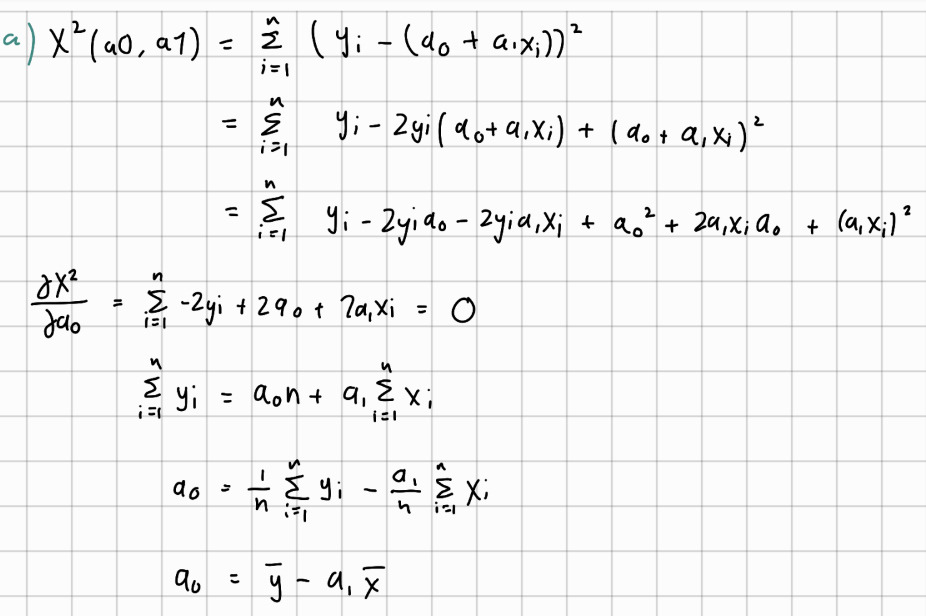

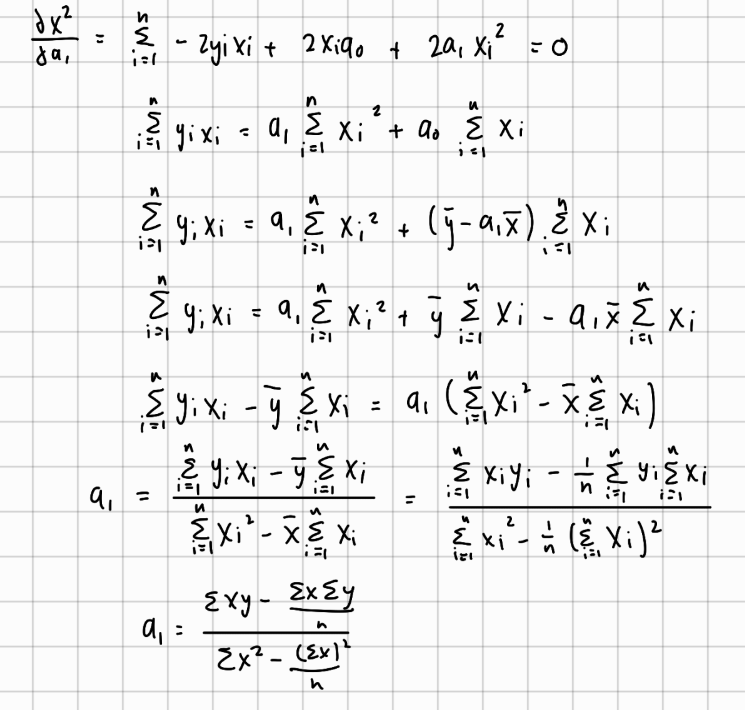

b) Minimize χ2(a0,a1,a2)  para  encontrar  el  siguiente  sistema  de  ecuaciones. ¿Nota  alguna regularidad?

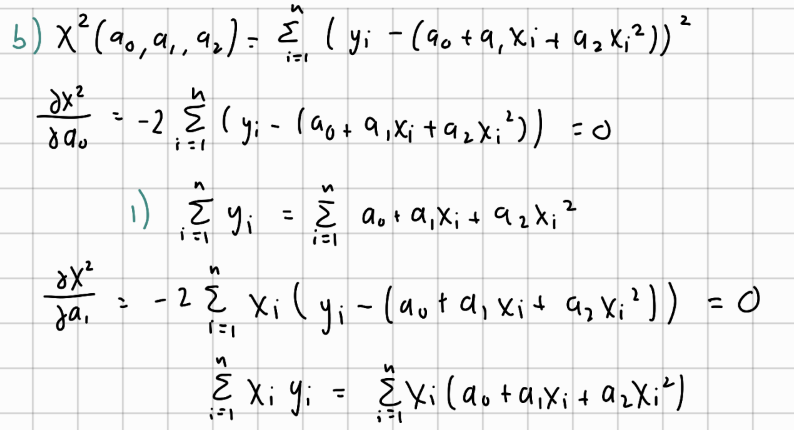

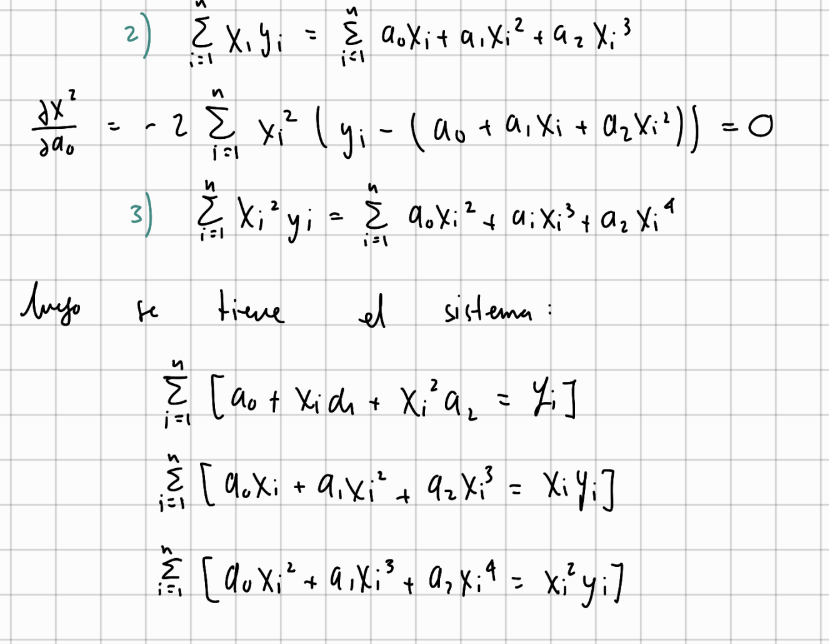

El sistema de ecuaciones presenta una simetría en las sumas de potencias de x,  característica de una regresión polinomial. Si suponemos una matriz con los coeficientes del sistema, se organización facilita la resolución del sistema y asegura una correspondencia directa entre las potencias de x y los términos del modelo cuadrático, lo que simplifica los cálculos en regresión.

#7. Proyección ortogonal

a) Mínimos cuadrados matriciales

In [ ]:
b=np.array([-3,-3, 8,9])

u1=np.array([3,1,0,1])
u2=np.array([1,2,1,1])
u3= np.array([-1,0,2,-1])

A = np.array([[3, 1, -1],
              [1, 2, 0],
              [0, 1, 2],
              [1, 1, -1]])

AT = np.dot(A.T,A)
bT = np.dot(A.T,b)

xsol = np.linalg.solve(AT,bT)
xsol

In [ ]:
p= np.dot(A,xsol)
p

b) Usando Grand-Schmidt

In [ ]:
import numpy as np

def gram_schmidt(v):
    u=np.zeros((v.shape[0],v.shape[1]))
    for i in range(v.shape[0]):
        u[i]=v[i]
        for j in range(i):
            u[i] -= np.dot(v[i],u[j])/np.dot(u[j],u[j])*u[j]
        u[i] /= np.linalg.norm(u[i])
    return u

U = np.array([u1, u2, u3])
V = gram_schmidt(U)

print("Base ortonormal:")
print(V)

proyeccion_b = sum(np.dot(b, v) * v for v in V)

print("Proyección ortogonal pW(b) usando Gram-Schmidt:")
print(proyeccion_b)

#Algoritmo genético

In [256]:
import numpy as np
import copy
from IPython.display import clear_output
import matplotlib.pyplot as plt

def LennardJones(r, epsilon=1, sigma=1):
    """
    Potencial de Lennard-Jones para dos partículas a una distancia r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def TotalEnergy(positions, epsilon=1, sigma=1):
    """
    Calcula la energía total de un sistema de partículas en posiciones dadas.
    """
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])  # Distancia entre partículas
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy

In [257]:
class Robot:

    def __init__(self,N=50):
      self.posicion = np.random.uniform(-10.,10.,size = (N,2))
      self.SetFitness()

    def Mutate(self,N=50):
      self.posicion += np.random.uniform(-1,1, size =(N,2))

    def GetP(self):
      return self.posicion

    def GetFitness(self):
      return self.Fitness

    def SetFitness(self):
      self.Fitness = TotalEnergy(self.posicion)

In [258]:
def GetRobots(N):

  Robots = []

  for i in range(N):
    r = Robot()
    Robots.append(r)

  return Robots

In [259]:

def Genetic(Robots, epochs=100):

    N = int(0.9 * len(Robots))  # Se escogerá el 80% de los robots
    Fitness = np.array([])

    for e in range(epochs):
        # Mutar el genoma
      for i, p in enumerate(Robots):
          p.Mutate()
          p.SetFitness()

        # Queremos medir cual es más apto
      score = [(p.Fitness, p) for p in Robots]
        # Como ordenamos
      score = sorted(score, key=lambda x: x[0],reverse=False)# De menor a mayor

        # Se seleccionan los N más aptos
      Temp = [r[1] for i,r in enumerate(score) if i < N ]  # Tomamos los N más aptos

        # Reintroducción aleatoria de algunos individuos
      for i in range(int(0.1 * len(Robots))):  # Un 20% de los robots se reintroducen aleatoriamente
          Robots[i] = Robot()

        # Asignar robots desde los más aptos
      for i, r in enumerate(Robots):
          j = i % N  # Asegurarse de no exceder el índice
          Robots[i] = copy.deepcopy(Temp[j])


In [260]:
Robots = GetRobots(50)
Genetic(Robots)

In [261]:
robot_respuesta = Robots[0]
robot_respuesta.GetFitness()

-5.362755524264852